In [206]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [207]:
df = pd.read_csv('survey_results_public.csv')

In [208]:
df.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


In [209]:
# filter NaN
print(df.shape)
df = df.dropna(thresh=df.shape[1]*0.4)
df.shape

(73268, 79)


(70028, 79)

In [210]:
selectedCategorical = [
    'Age',
    'MainBranch',
    'OrgSize',
    'Country',
    'RemoteWork',
    'CompFreq',
    'YearsCode',
    'YearsCodePro'
]
multiCat = [
    'Employment',
    'EdLevel',
    'MentalHealth',
    'CodingActivities',
    'DevType',
    'LanguageHaveWorkedWith',
    'Gender'
]
selectedNumerical = ['CompTotal']

In [211]:
df3 = df[selectedCategorical]
uniqueVal = { col:pd.unique(df3[col]) for col in selectedCategorical}

df1 = df[multiCat]
uniqueValMulticat = { col:pd.unique(df1[col]) for col in multiCat}

uniqueValMulticat

{'Employment': array(['Employed, full-time', 'Student, full-time', 'Student, part-time',
        'Not employed, but looking for work',
        'Independent contractor, freelancer, or self-employed',
        'Employed, full-time;Independent contractor, freelancer, or self-employed',
        'Employed, part-time', 'Student, part-time;Employed, part-time',
        'Not employed, and not looking for work',
        'Student, full-time;Employed, part-time',
        'Employed, full-time;Student, part-time',
        'Employed, full-time;Student, full-time',
        'Student, part-time;Independent contractor, freelancer, or self-employed',
        'Retired', 'Student, full-time;Not employed, but looking for work',
        'I prefer not to say',
        'Student, full-time;Independent contractor, freelancer, or self-employed',
        nan, 'Student, full-time;Not employed, and not looking for work',
        'Not employed, but looking for work;Independent contractor, freelancer, or self-employed'

In [212]:
# Split categorical data by separator into one-hot columns
data_df = df[selectedCategorical+selectedNumerical]

for col in multiCat:
    df_temp = df1[col].str.get_dummies(sep = ';').add_prefix(col+' - ')
    print(df_temp.shape)
    data_df = data_df.join(df_temp)

(70028, 9)
(70028, 9)
(70028, 8)
(70028, 7)
(70028, 29)
(70028, 42)
(70028, 5)


In [213]:
data_df

,Age,MainBranch,OrgSize,Country,RemoteWork,CompFreq,YearsCode,YearsCodePro,CompTotal,"Employment - Employed, full-time",...,LanguageHaveWorkedWith - Scala,LanguageHaveWorkedWith - Solidity,LanguageHaveWorkedWith - Swift,LanguageHaveWorkedWith - TypeScript,LanguageHaveWorkedWith - VBA,Gender - Man,"Gender - Non-binary, genderqueer, or gender non-conforming","Gender - Or, in your own words:",Gender - Prefer not to say,Gender - Woman
2,25-34 years old,"I am not primarily a developer, but I write co...",20 to 99 employees,United Kingdom of Great Britain and Northern I...,"Hybrid (some remote, some in-person)",Yearly,14,5,32000.0,1,...,0,0,0,0,0,1,0,0,0,0
3,35-44 years old,I am a developer by profession,100 to 499 employees,Israel,Fully remote,Monthly,20,17,60000.0,1,...,0,0,0,1,0,1,0,0,0,0
4,25-34 years old,I am a developer by profession,20 to 99 employees,United States of America,"Hybrid (some remote, some in-person)",NaN,8,3,NaN,1,...,0,0,1,1,0,0,0,0,0,0
5,25-34 years old,"I am not primarily a developer, but I write co...",NaN,Germany,NaN,NaN,15,NaN,NaN,0,...,0,0,0,0,0,0,0,1,0,0
6,Under 18 years old,I code primarily as a hobby,NaN,India,NaN,NaN,3,NaN,NaN,0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73263,25-34 years old,I am a developer by profession,100 to 499 employees,Nigeria,Fully remote,Yearly,8,5,60000.0,1,...,0,0,0,1,0,1,0,0,0,0
73264,25-34 years old,I am a developer by profession,I don’t know,United States of America,Full in-person,Yearly,6,5,107000.0,1,...,0,0,0,0,0,1,0,0,0,0
73265,55-64 years old,"I am not primarily a developer, but I write co...",20 to 99 employees,United States of America,"Hybrid (some remote, some in-person)",NaN,42,33,NaN,1,...,0,0,0,0,0,1,0,0,0,0
73266,55-64 years old,I am a developer by profession,10 to 19 employees,United Kingdom of Great Britain and Northern I...,"Hybrid (some remote, some in-person)",Yearly,50,31,58500.0,1,...,0,0,0,0,1,1,0,0,0,0


In [218]:
data_df = data_df.dropna(thresh=data_df.shape[1]*0.95)
data_df.shape

(69846, 118)

<AxesSubplot: xlabel='Age', ylabel='Count'>

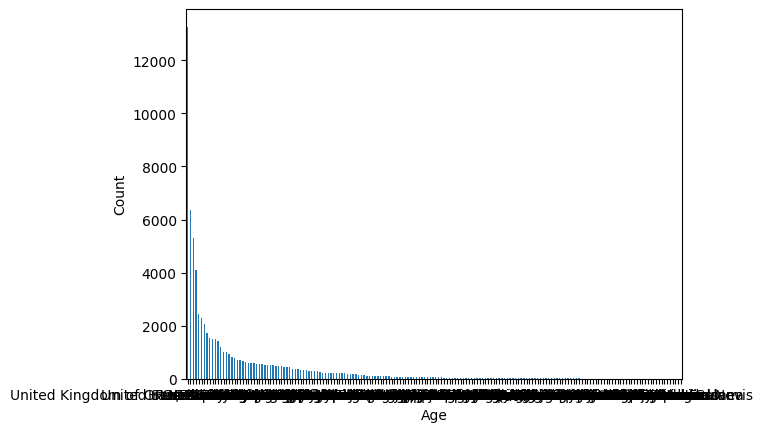

In [225]:
df['Country'].value_counts().plot(kind='bar', xlabel='Age', ylabel='Count', rot=0)

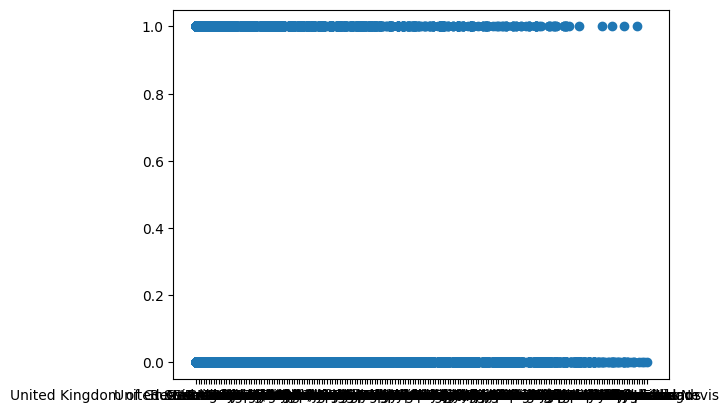

In [223]:
plt.scatter(data_df['Country'],data_df['MentalHealth - I have a mood or emotional disorder (e.g., depression, bipolar disorder, etc.)'])